In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Cliff_Gridworld:

    def __init__(self,n,r,c):

        self.no_of_episodes = n
        self.no_of_rows = r
        self.no_of_cols = c
        self.actions = list()
        self.actions.append([0, 1])
        self.actions.append([0, -1])
        self.actions.append([1, 0])
        self.actions.append([-1, 0])
        self.epsilon = 0.1
        self.alpha = 0.5
        self.action_values = np.zeros((r*c,4))
        self.rewards = np.zeros(n)
        self.initial_state = [3,0]

    def get_1d_state_coord(self, state):

        return state[0] * self.no_of_cols + state[1]

    def take_step(self,state,action):

        next_state = list()
        next_state.append(state[0]+action[0])
        next_state.append(state[1]+action[1])
        reward = -1
        if next_state[0] < 0 or next_state[0] >= self.no_of_rows or next_state[1] < 0 or next_state[1] >= self.no_of_cols:
            next_state = state
        if next_state[0] == 3 and 1 <= next_state[1] <= self.no_of_cols - 2:
            next_state = self.initial_state
            reward = -100
        return next_state, reward

    def policy(self,state):

        random_v = np.random.uniform(0, 1)
        if random_v <= self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.action_values[state])
        return action

    def sarsa(self):

        for i in range(self.no_of_episodes):
            current_state = self.initial_state
            x1 = self.get_1d_state_coord(current_state)
            current_action = self.policy(x1)
            while True:
                x1 = self.get_1d_state_coord(current_state)
                next_state, reward = self.take_step(current_state, self.actions[current_action])
                self.rewards[i] = reward + self.rewards[i]
                x2 = self.get_1d_state_coord(next_state)
                next_action = self.policy(x2)
                y1 = current_action
                y2 = next_action
                self.action_values[x1, y1] += self.alpha*(reward + self.action_values[x2, y2] - self.action_values[x1, y1])
                current_state = next_state
                current_action = next_action
                if x2 == ((self.no_of_rows*self.no_of_cols) - 1):
                    break
            self.rewards[i] = max(self.rewards[i], -100)

    def q_learning(self):

        for i in range(self.no_of_episodes):
            current_state = self.initial_state
            while True:
                x1 = self.get_1d_state_coord(current_state)
                action = self.policy(x1)
                next_state, reward = self.take_step(current_state, self.actions[action])
                self.rewards[i] = reward + self.rewards[i]
                x2 = self.get_1d_state_coord(next_state)
                self.action_values[x1, action] += self.alpha*(reward + np.max(self.action_values[x2]) - self.action_values[x1, action])
                current_state = next_state
                if x2 == (self.no_of_rows*self.no_of_cols - 1):
                    break
            self.rewards[i] = max(self.rewards[i], -100)


In [3]:
def run():

    no_of_runs = 200
    no_of_episodes = 500
    sarsa_sum = np.zeros((no_of_runs, no_of_episodes))
    q_learning_sum = np.zeros((no_of_runs, no_of_episodes))
    for i in range(no_of_runs):
        obj_sarsa = Cliff_Gridworld(no_of_episodes, 4, 12)
        obj_q_learning = Cliff_Gridworld(no_of_episodes, 4, 12)
        obj_sarsa.sarsa()
        sarsa_sum[i] = obj_sarsa.rewards
        obj_q_learning.q_learning()
        q_learning_sum[i] = obj_q_learning.rewards
    plt.plot(np.mean(sarsa_sum, axis=0), label='Sarsa')
    plt.plot(np.mean(q_learning_sum, axis=0), label='Q-Learning')
    plt.legend()
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.ylim([-100, 0])
    plt.savefig('q7.png')
    plt.show()
    plt.close()

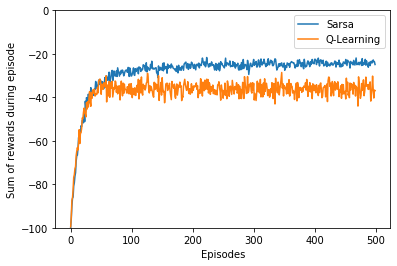

In [4]:
run()